### Introduction

Taxi companies with number of rides and top 10 neighborhoods by number of dropoffs were plotted. The null hypothesis of "The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays" was tested and rejected. 

In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [82]:
trips = pd.read_csv('/Users/betulyildirim/project_sql_result_01.csv')
dropoff = pd.read_csv('/Users/betulyildirim/project_sql_result_04.csv')
weather = pd.read_csv('/Users/betulyildirim/project_sql_result_07.csv')

## Trips 

In [83]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [107]:
trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [84]:
top_trips = trips.query('trips_amount > 500')

Companies filtered by having more than 500 trips. 

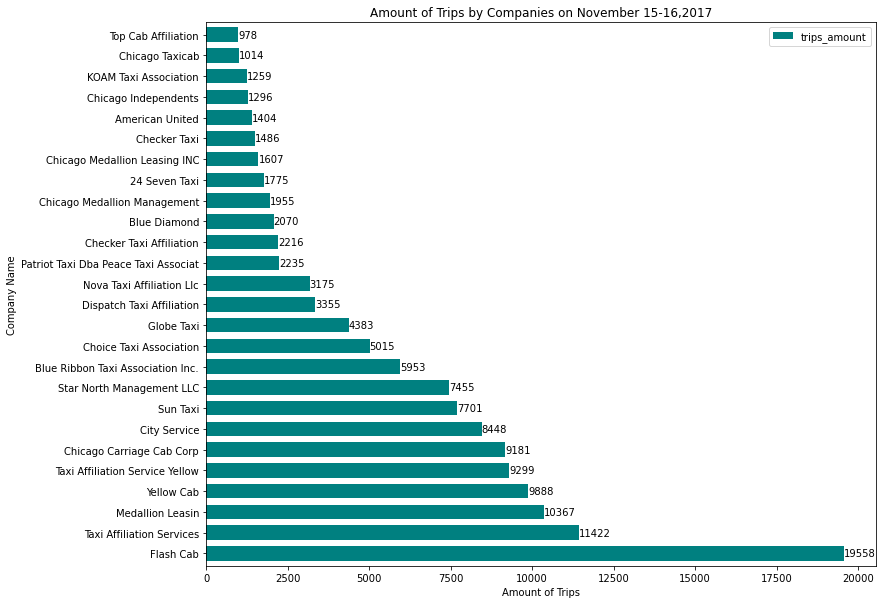

In [85]:
ax = top_trips.plot(kind='barh', x='company_name', figsize=(12,10), width=0.7, color='teal')

ax.bar_label(ax.containers[0])
ax.set_title('Amount of Trips by Companies on November 15-16,2017')
ax.set_xlabel('Amount of Trips')
ax.set_ylabel('Company Name')
plt.show()

Flash Cab company had the most trips, almost twice as Taxi Affiliation Services which came in second, on November 15-16, 2017.

## Top 10 Neighboorhoods in Terms of Drop-off

In [86]:
dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [87]:
dropoff.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [88]:
dropoff['average_trips'] = dropoff['average_trips'].astype(int)

The data type of average_trips column was converted to integer instead of float as fractions can't count as trips.

In [89]:
top_dropoff = dropoff.head(10)

The table was already sorted in descending order. Therefore, I used the top 10.

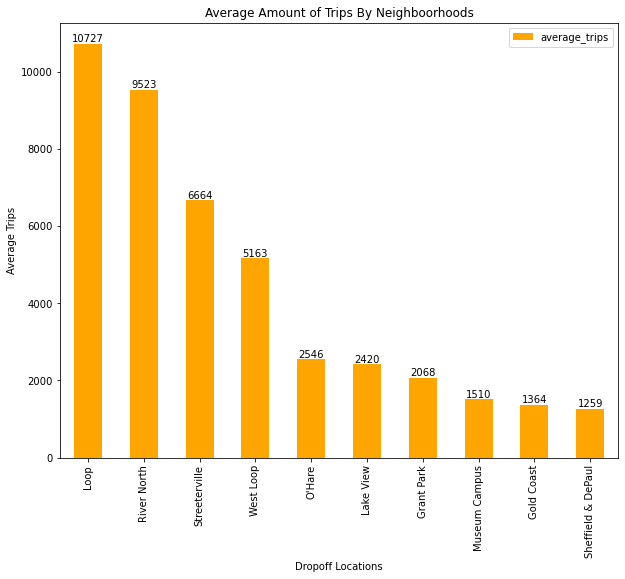

In [90]:
fig = top_dropoff.plot(kind='bar', x='dropoff_location_name', figsize=(10,8), color = 'orange')

fig.bar_label(fig.containers[0])
fig.set_ylabel('Average Trips')
fig.set_xlabel('Dropoff Locations')
fig.set_title('Average Amount of Trips By Neighboorhoods')
plt.show()

Top 10 neighboorhoods in terms of drop-off are Loop, River North, Streeterville, West Loop O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul, respectively. 

## Testing The Hypothesis

In [91]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [92]:
weather.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


#### Hypothesis

H0: The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

H1: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [100]:
good_weather = weather.query('weather_conditions == "Good"')
good_seconds = good_weather['duration_seconds']

In [101]:
bad_weather = weather.query('weather_conditions == "Bad"')
bad_seconds = bad_weather['duration_seconds']

In [102]:
alpha = 0.05

results = st.ttest_ind(good_seconds, bad_seconds)

print('p_value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis.')



p_value: 6.517970327099473e-12
We reject the null hypothesis.


### Conclusion

Companies which had more than 500 trips between November 15-16, 2017 were plotted. Flash Cab company had most amount of trips. Top 10 neighboorhoods in terms of drop-off were found to be Loop, River North, Streeterville, West Loop O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul and plotted as a bar graph. The null hypothesis is rejected meaning, the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. 
